In [47]:
#Import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [48]:
#Import the dataset
df=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
#Data Exploration
def basic_eda(df):
    print("----------HEAD--------")
    print(df.head())
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)
    

In [50]:
#Data Exploration
basic_eda(df)

----------HEAD--------
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
N

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

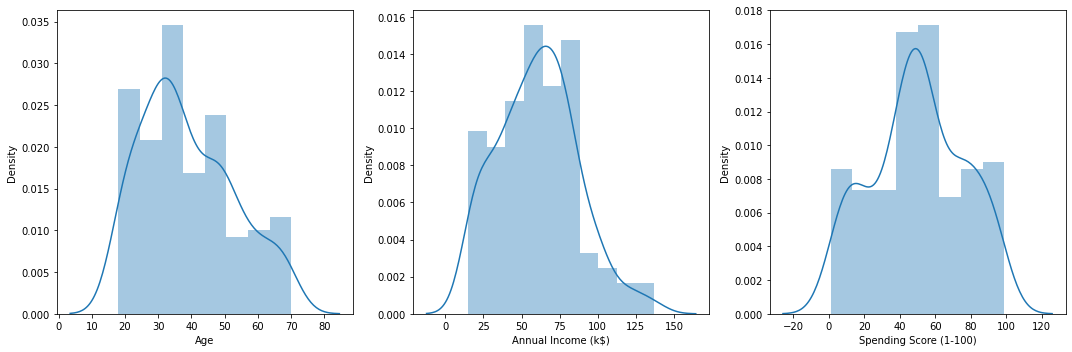

In [51]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))
for i, column in enumerate(columns):
    ax = axs[i]
    # Histogram
    sns.distplot(df[column], ax=ax)
plt.tight_layout()
plt.show()


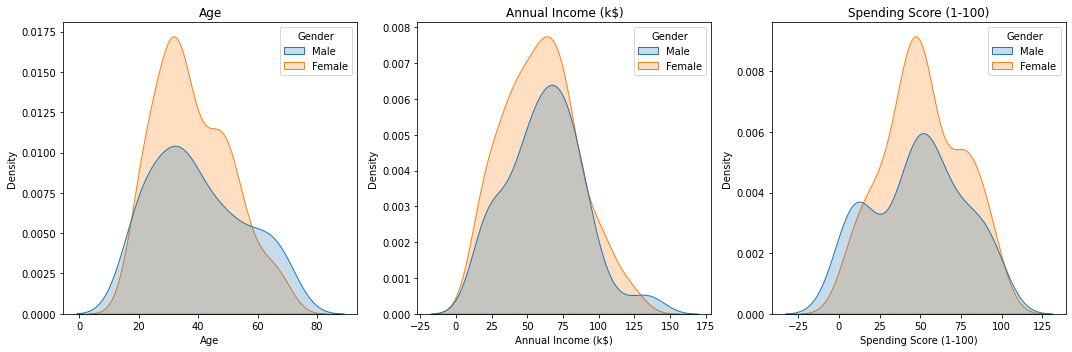

In [52]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))
for i, column in enumerate(columns):
    ax = axs[i]
    # KDE Plot
    sns.kdeplot(df[column], shade=True, hue=df['Gender'], ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()


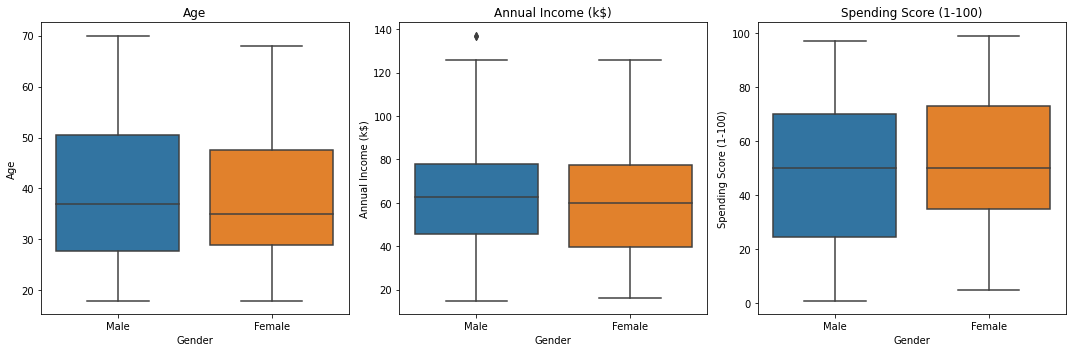

In [53]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))
for i, column in enumerate(columns):
    ax = axs[i]
    # Box Plot
    sns.boxplot(data=df, x='Gender', y=df[column], ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()


<Figure size 1440x576 with 0 Axes>

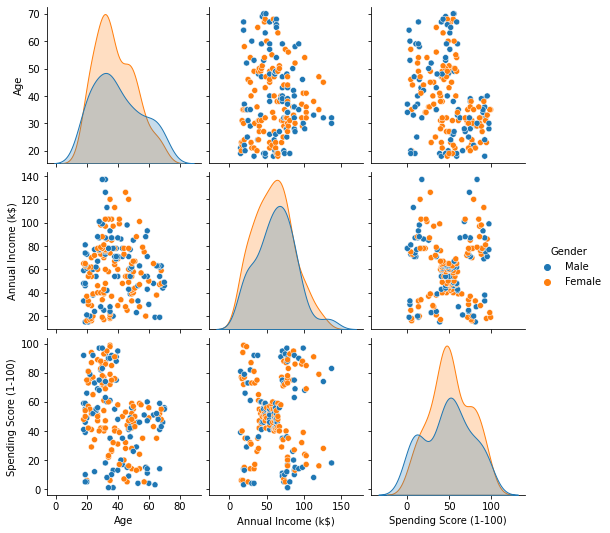

In [54]:
#Data Visualization
plt.figure(figsize=(20, 8))
sns.pairplot(df.drop(columns='CustomerID'),hue='Gender')

In [55]:
(df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].agg({np.mean,np.median})).T

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Gender                            Female       Male
Age                    mean    38.098214  39.806818
                       median  35.000000  37.000000
Annual Income (k$)     mean    59.250000  62.227273
                       median  60.000000  62.500000
Spending Score (1-100) mean    51.526786  48.511364
                       median  50.000000  50.000000

<AxesSubplot:>

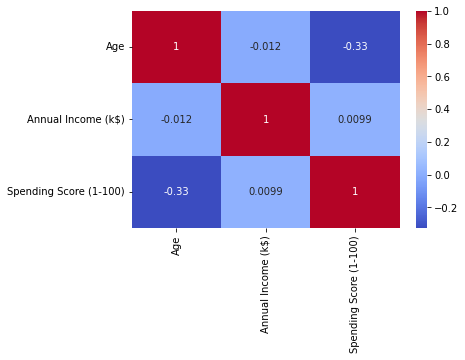

In [56]:
#corr
sns.heatmap(df.drop(columns='CustomerID').corr(),annot=True,cmap='coolwarm')

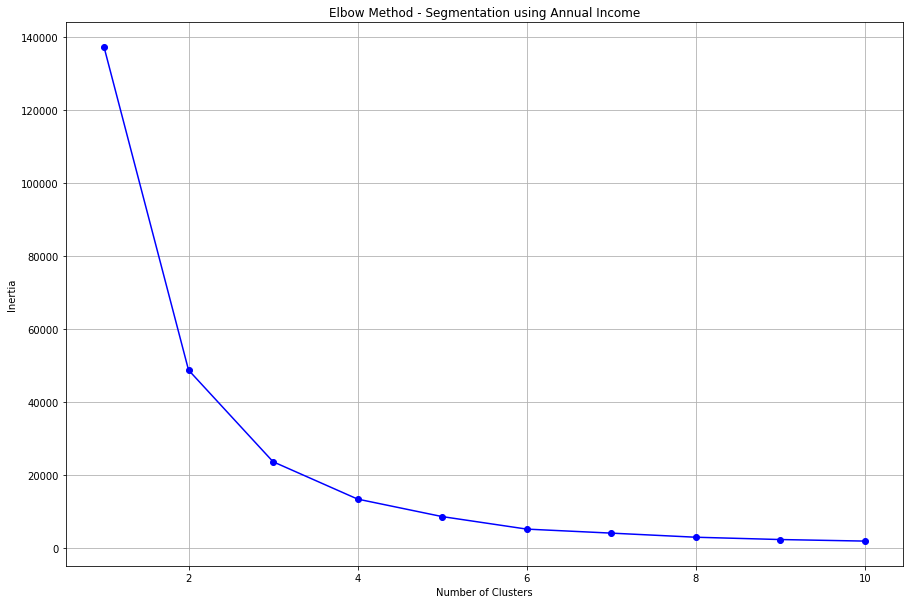

In [57]:
# Perform K-means clustering and calculate inertia for different cluster sizes
kss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    kss.append(kmeans.inertia_)

# Set figure size
plt.figure(figsize=(15, 10))

# Plot the line graph
plt.plot(range(1, 11), kss, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Segmentation using Annual Income')

# Add gridlines
plt.grid(True)

# Display the plot
plt.show()


In [58]:
#Segmentation using Annual Income k=3
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = clustering1.labels_
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


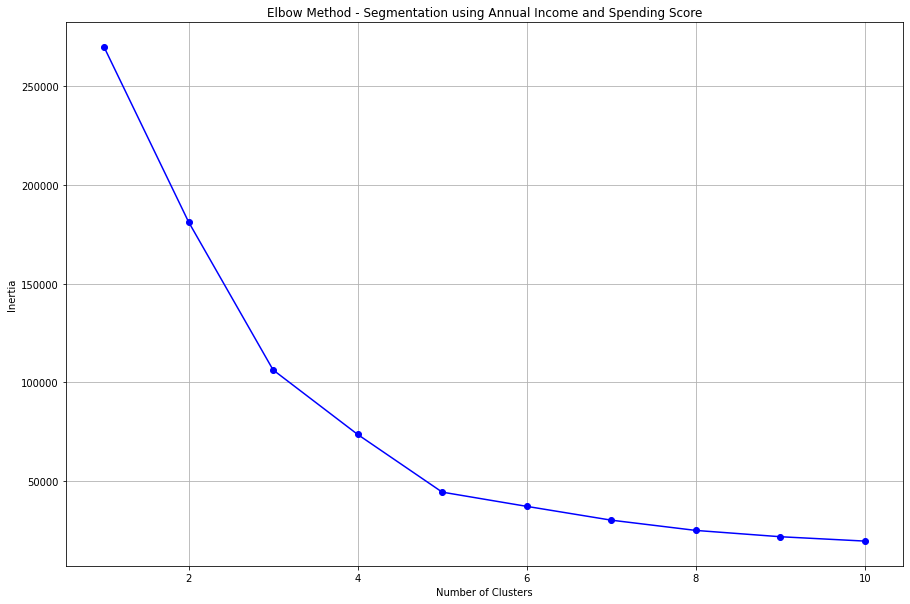

In [59]:
# Perform K-means clustering and calculate inertia for different cluster sizes
kss2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    kss2.append(kmeans2.inertia_)
plt.figure(figsize=(15, 10))

# Plot the line graph
plt.plot(range(1, 11), kss2, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Segmentation using Annual Income and Spending Score')

# Add gridlines
plt.grid(True)

# Display the plot
plt.show()


In [60]:
#Segmentation using Annual Income and Spending Score k=5
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


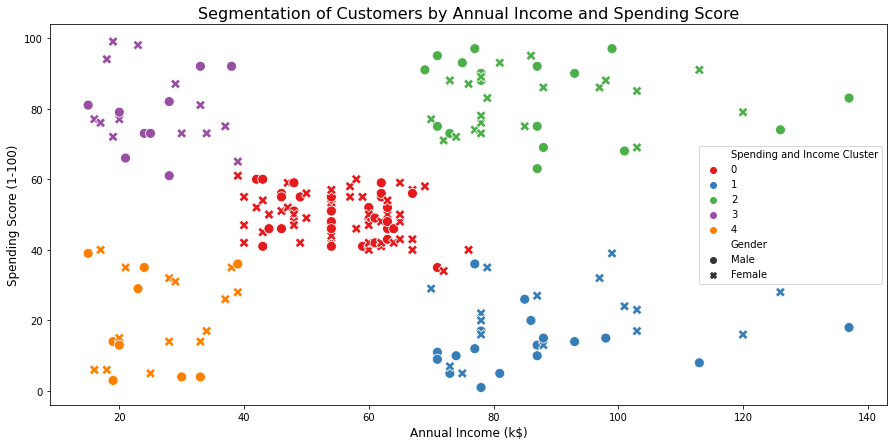

In [61]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Spending and Income Cluster',
    style='Gender',
    palette='Set1',
    s=100  # Adjust the size of the markers
)

plt.title('Segmentation of Customers by Annual Income and Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [62]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [63]:
(df.groupby('Spending and Income Cluster',as_index=False)['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].agg(
    min_age=pd.NamedAgg(column='Age', aggfunc='min'),
    max_age=pd.NamedAgg(column='Age', aggfunc='max'),
    mean_Annual_Income=pd.NamedAgg(column='Annual Income (k$)', aggfunc='mean'),
    meanSpending_Score=pd.NamedAgg(column='Spending Score (1-100)', aggfunc='mean'))).sort_values(by='meanSpending_Score',ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Spending and Income Cluster,min_age,max_age,mean_Annual_Income,meanSpending_Score
2,2,27,40,86.538462,82.128205
3,3,18,35,25.727273,79.363636
0,0,18,70,55.296296,49.518519
4,4,19,67,26.304348,20.913043
1,1,19,59,88.200000,17.114286
